In [259]:
#Libraries
import folium
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import pandas as pd
import plotly.express as px
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
import seaborn as sns

In [260]:
%matplotlib inline

In [261]:
#Read Dataset
df=pd.read_csv('/Users/cassiopeiae/Desktop/Entrenamiento/Incidentes viales CDMX/inViales_completa.csv')

In [262]:
#Read Mexico City map
mx = gpd.read_file('/Users/cassiopeiae/Desktop/Entrenamiento/Incidentes viales CDMX/poligonos_alcaldias_cdmx.shp')

<Axes: >

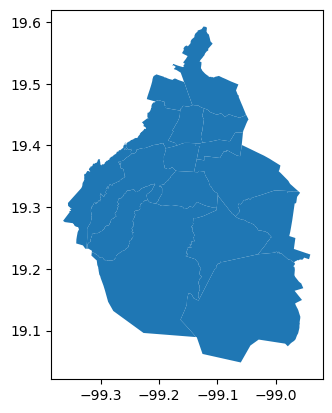

In [263]:
mx.plot()

In [264]:
#We filter only reports conffirmed 
df=df[(df['codigo_cierre']=='A')]
df=df.dropna(subset=['alcaldia_inicio'])


In [265]:
#Convert columns to date time format

df['fecha_creacion'] = pd.to_datetime(df['fecha_creacion'])
df['hora_creacion'] = pd.to_datetime(df['hora_creacion'], format='%H:%M:%S').dt.time

In [266]:
df.head()

,folio,fecha_creacion,hora_creacion,dia_semana,fecha_cierre,hora_cierre,tipo_incidente_c4,incidente_c4,alcaldia_inicio,codigo_cierre,clas_con_f_alarma,tipo_entrada,alcaldia_cierre,alcaldia_catalogo,colonia_catalogo,longitud,latitud
0,C4/140101/02301,2014-01-01,13:24:48,Miércoles,2014-01-01,16:49:00,Accidente,Choque sin lesionados,IZTAPALAPA,A,EMERGENCIA,LLAMADA DEL 066,IZTAPALAPA,Iztapalapa,Leyes De Reforma 3a Seccion,-99.06104,19.38090
1,C4/140101/04188,2014-01-01,21:44:59,Miércoles,2014-01-01,21:55:02,Accidente,Choque sin lesionados,GUSTAVO A. MADERO,A,EMERGENCIA,LLAMADA DEL 066,GUSTAVO A. MADERO,Gustavo A. Madero,Martin Carrera,-99.10342,19.49053
4,C4/140101/04189,2014-01-01,21:45:43,Miércoles,2014-01-01,23:55:59,Accidente,Choque con lesionados,ALVARO OBREGON,A,URGENCIAS MEDICAS,LLAMADA DEL 066,ALVARO OBREGON,Álvaro Obregón,Los Alpes,-99.19104,19.36336
5,C4/140101/03736,2014-01-01,19:47:28,Miércoles,2014-01-01,20:27:26,Accidente,Choque sin lesionados,TLAHUAC,A,EMERGENCIA,LLAMADA DEL 066,TLAHUAC,Tláhuac,La Nopalera,-99.05488,19.29544
6,C4/131231/02685,2013-12-31,19:49:19,Martes,2014-01-01,00:46:58,Accidente,Choque con lesionados,AZCAPOTZALCO,A,URGENCIAS MEDICAS,LLAMADA DEL 066,AZCAPOTZALCO,Azcapotzalco,Petrolera,-99.19781,19.48238


In [267]:
#Convert Mayorships into numerical values
alcaldias=df['alcaldia_inicio'].unique()
df['Alcaldias_Numero'] = df['alcaldia_inicio'].map({alcaldia: idx + 1 for idx, alcaldia in enumerate(alcaldias)})

In [268]:
#Convert days of the week into numerical values
# Map diccionary
mapping_days = {
    'Lunes': 1,
    'Martes': 2,
    'Miércoles': 3,
    'Jueves': 4,
    'Viernes': 5,
    'Sábado': 6,
    'Domingo': 7,
}
dia_numero=df['dia_semana'].unique()
df['dia_numerico'] = df['dia_semana'].map(mapping_days)

In [269]:
#Convert accident type into numerical values
tipo_choque=df['incidente_c4'].unique()
tipo_choque

array(['Choque sin lesionados', 'Choque con lesionados',
       'Persona atrapada / desbarrancada', 'Atropellado', 'Otros',
       'Accidente automovilístico', 'Volcadura', 'Ferroviario',
       'Motociclista', 'Vehiculo desbarrancado', 'Choque con prensados',
       'Vehiculo atrapado', 'Persona atropellada', 'Ciclista',
       'Vehículo atrapadovarado', 'Monopatín', 'Incidente de tránsito'],
      dtype=object)

In [270]:
# Map diccionary
mapping = {
    'Otros': 1,
    'Choque sin lesionados': 2,
    'Ferroviario': 3,
    'Ciclista': 4,
    'Monopatín': 5,
    'Motociclista': 6,
    'Vehículo atrapadovarado': 7,
    'Incidente de tránsito': 8,
    'Vehiculo atrapado': 9,
    'Accidente automovilístico': 10,
    'Persona atrapada / desbarrancada': 11,
    'Vehiculo desbarrancado': 12,
    'Volcadura': 13,
    'Choque con lesionados': 14,
    'Choque con prensados': 15,
     'Persona atropellada': 16,
    'Atropellado': 16
}
tipo_choque=df['incidente_c4'].unique()
df['tipo_choque'] = df['incidente_c4'].map(mapping)

In [271]:
#Assign coordinates values as geometrical points
df_geo=gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitud,df.latitud))

In [272]:
df_geo

,folio,fecha_creacion,hora_creacion,dia_semana,fecha_cierre,hora_cierre,tipo_incidente_c4,incidente_c4,alcaldia_inicio,codigo_cierre,...,tipo_entrada,alcaldia_cierre,alcaldia_catalogo,colonia_catalogo,longitud,latitud,Alcaldias_Numero,dia_numerico,tipo_choque,geometry
0,C4/140101/02301,2014-01-01,13:24:48,Miércoles,2014-01-01,16:49:00,Accidente,Choque sin lesionados,IZTAPALAPA,A,...,LLAMADA DEL 066,IZTAPALAPA,Iztapalapa,Leyes De Reforma 3a Seccion,-99.061040,19.380900,1,3,2,POINT (-99.06104 19.38090)
1,C4/140101/04188,2014-01-01,21:44:59,Miércoles,2014-01-01,21:55:02,Accidente,Choque sin lesionados,GUSTAVO A. MADERO,A,...,LLAMADA DEL 066,GUSTAVO A. MADERO,Gustavo A. Madero,Martin Carrera,-99.103420,19.490530,2,3,2,POINT (-99.10342 19.49053)
4,C4/140101/04189,2014-01-01,21:45:43,Miércoles,2014-01-01,23:55:59,Accidente,Choque con lesionados,ALVARO OBREGON,A,...,LLAMADA DEL 066,ALVARO OBREGON,Álvaro Obregón,Los Alpes,-99.191040,19.363360,3,3,14,POINT (-99.19104 19.36336)
5,C4/140101/03736,2014-01-01,19:47:28,Miércoles,2014-01-01,20:27:26,Accidente,Choque sin lesionados,TLAHUAC,A,...,LLAMADA DEL 066,TLAHUAC,Tláhuac,La Nopalera,-99.054880,19.295440,4,3,2,POINT (-99.05488 19.29544)
6,C4/131231/02685,2013-12-31,19:49:19,Martes,2014-01-01,00:46:58,Accidente,Choque con lesionados,AZCAPOTZALCO,A,...,LLAMADA DEL 066,AZCAPOTZALCO,Azcapotzalco,Petrolera,-99.197810,19.482380,5,2,14,POINT (-99.19781 19.48238)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115054,C5/20240229/03708,2024-02-29,18:59:37,Jueves,2024-02-29,22:06:17,Accidente,Motociclista,IZTAPALAPA,A,...,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,Central De Abasto,-99.094880,19.374020,1,4,6,POINT (-99.09488 19.37402)
2115056,C5/20240229/03696,2024-02-29,18:57:50,Jueves,2024-02-29,22:06:17,Accidente,Motociclista,GUSTAVO A. MADERO,A,...,LLAMADA DEL 911,GUSTAVO A. MADERO,Gustavo A. Madero,Ampliacion Gabriel Hernandez,-99.101453,19.505975,2,4,6,POINT (-99.10145 19.50597)
2115075,C5/20240229/04009,2024-02-29,19:53:36,Jueves,2024-02-29,23:16:21,Accidente,Choque con lesionados,IZTAPALAPA,A,...,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,El Vergel,-99.087270,19.320600,1,4,14,POINT (-99.08727 19.32060)
2115076,C5/20240229/04038,2024-02-29,20:01:42,Jueves,2024-02-29,23:06:17,Accidente,Choque con lesionados,CUAUHTEMOC,A,...,RADIO,CUAUHTEMOC,Cuauhtémoc,Centro,-99.125200,19.428723,7,4,14,POINT (-99.12520 19.42872)


In [273]:
#Plot the first 100 points
puntos_especificos = df_geo.iloc[0:100]
puntos_especificos

,folio,fecha_creacion,hora_creacion,dia_semana,fecha_cierre,hora_cierre,tipo_incidente_c4,incidente_c4,alcaldia_inicio,codigo_cierre,...,tipo_entrada,alcaldia_cierre,alcaldia_catalogo,colonia_catalogo,longitud,latitud,Alcaldias_Numero,dia_numerico,tipo_choque,geometry
0,C4/140101/02301,2014-01-01,13:24:48,Miércoles,2014-01-01,16:49:00,Accidente,Choque sin lesionados,IZTAPALAPA,A,...,LLAMADA DEL 066,IZTAPALAPA,Iztapalapa,Leyes De Reforma 3a Seccion,-99.06104,19.38090,1,3,2,POINT (-99.06104 19.38090)
1,C4/140101/04188,2014-01-01,21:44:59,Miércoles,2014-01-01,21:55:02,Accidente,Choque sin lesionados,GUSTAVO A. MADERO,A,...,LLAMADA DEL 066,GUSTAVO A. MADERO,Gustavo A. Madero,Martin Carrera,-99.10342,19.49053,2,3,2,POINT (-99.10342 19.49053)
4,C4/140101/04189,2014-01-01,21:45:43,Miércoles,2014-01-01,23:55:59,Accidente,Choque con lesionados,ALVARO OBREGON,A,...,LLAMADA DEL 066,ALVARO OBREGON,Álvaro Obregón,Los Alpes,-99.19104,19.36336,3,3,14,POINT (-99.19104 19.36336)
5,C4/140101/03736,2014-01-01,19:47:28,Miércoles,2014-01-01,20:27:26,Accidente,Choque sin lesionados,TLAHUAC,A,...,LLAMADA DEL 066,TLAHUAC,Tláhuac,La Nopalera,-99.05488,19.29544,4,3,2,POINT (-99.05488 19.29544)
6,C4/131231/02685,2013-12-31,19:49:19,Martes,2014-01-01,00:46:58,Accidente,Choque con lesionados,AZCAPOTZALCO,A,...,LLAMADA DEL 066,AZCAPOTZALCO,Azcapotzalco,Petrolera,-99.19781,19.48238,5,2,14,POINT (-99.19781 19.48238)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,C4/140101/03056,2014-01-01,16:52:56,Miércoles,2014-01-01,20:04:57,Lesionado,Atropellado,CUAUHTEMOC,A,...,LLAMADA DEL 066,CUAUHTEMOC,Cuauhtémoc,Felipe Pescador,-99.12477,19.45625,7,3,16,POINT (-99.12477 19.45625)
122,C4/140101/03041,2014-01-01,16:48:51,Miércoles,2014-01-01,18:44:06,Accidente,Choque sin lesionados,IZTAPALAPA,A,...,LLAMADA DEL 066,IZTAPALAPA,Iztapalapa,Ermita Zaragoza,-98.99518,19.35872,1,3,2,POINT (-98.99518 19.35872)
123,IZ/131231/03523,2013-12-31,23:29:23,Martes,2014-01-01,02:16:04,Accidente,Choque con lesionados,IZTAPALAPA,A,...,RADIO,IZTAPALAPA,Iztapalapa,San Miguel Teotongo Secc Corrales,-98.99204,19.33554,1,2,14,POINT (-98.99204 19.33554)
124,C4/140101/03948,2014-01-01,20:47:03,Miércoles,2014-01-01,22:29:09,Accidente,Choque sin lesionados,VENUSTIANO CARRANZA,A,...,LLAMADA DEL 066,VENUSTIANO CARRANZA,Venustiano Carranza,Puebla,-99.08295,19.40749,9,3,2,POINT (-99.08295 19.40749)


Text(137.61375662927222, 0.5, 'Latitude')

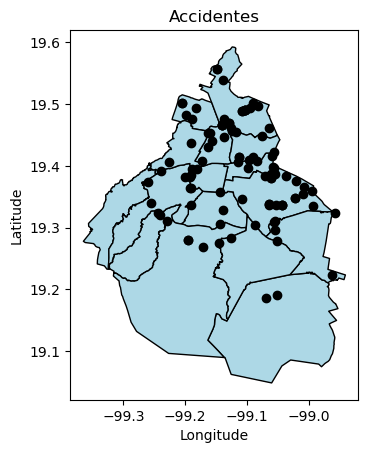

In [274]:

axis=mx.plot(
    color= 'lightblue', edgecolor='black')
puntos_especificos.plot(ax=axis, color='black')
plt.title('Accidentes')
plt.xlabel('Longitude')      # Título del eje X
plt.ylabel('Latitude')      # Título del eje Y

In [275]:
#Dataset in a period of time 
periodo = [2022]
mes=[4]
dia=[15]

#Seleccionar intervalo de tiempo
hora_inicio = pd.to_datetime('01:00:00', format='%H:%M:%S').time()
hora_fin = pd.to_datetime('23:00:00', format='%H:%M:%S').time()






In [276]:
#Dataset in a specific accident type and period
df_accident=df_geo[df_geo['tipo_choque']==16]
df_periodo = df_accident[(df_accident['fecha_creacion'].dt.year.isin(periodo)) & (df_accident['fecha_creacion'].dt.month.isin(mes)) & (df_accident['fecha_creacion'].dt.day.isin(dia))] 
                
df_periodo=df_periodo[(df_periodo['hora_creacion'] >= hora_inicio) & (df_periodo['hora_creacion'] <= hora_fin)]
df_periodo

,folio,fecha_creacion,hora_creacion,dia_semana,fecha_cierre,hora_cierre,tipo_incidente_c4,incidente_c4,alcaldia_inicio,codigo_cierre,...,tipo_entrada,alcaldia_cierre,alcaldia_catalogo,colonia_catalogo,longitud,latitud,Alcaldias_Numero,dia_numerico,tipo_choque,geometry
1669286,C5/20220415/00502,2022-04-15,01:23:21,Viernes,2022-04-15,04:30:06,Lesionado,Atropellado,IZTAPALAPA,A,...,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,Apatlaco,-99.118565,19.380287,1,5,16,POINT (-99.11856 19.38029)
1669289,C2O/20220415/00216,2022-04-15,18:43:40,Viernes,2022-04-15,23:14:37,Lesionado,Atropellado,IZTAPALAPA,A,...,BOTÓN DE AUXILIO,IZTAPALAPA,Iztapalapa,Desarrollo Urbano Quetzalcoatl,-99.041330,19.331200,1,5,16,POINT (-99.04133 19.33120)
1669290,C5/20220415/02426,2022-04-15,13:04:52,Viernes,2022-04-15,16:10:07,Lesionado,Atropellado,GUSTAVO A. MADERO,A,...,LLAMADA DEL 911,GUSTAVO A. MADERO,Gustavo A. Madero,San Felipe De Jesus,-99.067471,19.493449,2,5,16,POINT (-99.06747 19.49345)
1669384,C5/20220415/01213,2022-04-15,04:03:15,Viernes,2022-04-15,07:10:06,Lesionado,Atropellado,BENITO JUAREZ,A,...,RADIO,BENITO JUAREZ,Benito Juárez,Portales Sur,-99.146343,19.361989,11,5,16,POINT (-99.14634 19.36199)
1669385,C5/20220415/01147,2022-04-15,03:39:15,Viernes,2022-04-15,06:50:05,Lesionado,Atropellado,CUAUHTEMOC,A,...,LLAMADA DEL 911,CUAUHTEMOC,Cuauhtémoc,Obrera,-99.136720,19.414182,7,5,16,POINT (-99.13672 19.41418)
1669386,C5/20220415/03755,2022-04-15,19:11:29,Viernes,2022-04-15,22:20:08,Lesionado,Atropellado,CUAUHTEMOC,A,...,LLAMADA DEL 911,CUAUHTEMOC,Cuauhtémoc,Guerrero,-99.143772,19.451032,7,5,16,POINT (-99.14377 19.45103)
1669389,C5/20220415/03795,2022-04-15,19:20:47,Viernes,2022-04-15,22:30:08,Lesionado,Atropellado,IZTAPALAPA,A,...,RADIO,IZTAPALAPA,Iztapalapa,Pueblo Culhuacan,-99.109093,19.335947,1,5,16,POINT (-99.10909 19.33595)
1669392,C5/20220415/02880,2022-04-15,15:26:44,Viernes,2022-04-15,18:30:09,Lesionado,Atropellado,CUAUHTEMOC,A,...,RADIO,CUAUHTEMOC,Cuauhtémoc,Centro,-99.127940,19.426005,7,5,16,POINT (-99.12794 19.42600)
1669393,C5/20220415/02927,2022-04-15,15:45:54,Viernes,2022-04-15,18:50:07,Lesionado,Atropellado,TLAHUAC,A,...,RADIO,TLAHUAC,Tláhuac,Barrio San Miguel,-98.973498,19.306404,4,5,16,POINT (-98.97350 19.30640)
1669394,C5/20220415/02678,2022-04-15,14:27:32,Viernes,2022-04-15,17:40:05,Lesionado,Atropellado,IZTAPALAPA,A,...,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,Valle Del Sur,-99.111902,19.346674,1,5,16,POINT (-99.11190 19.34667)


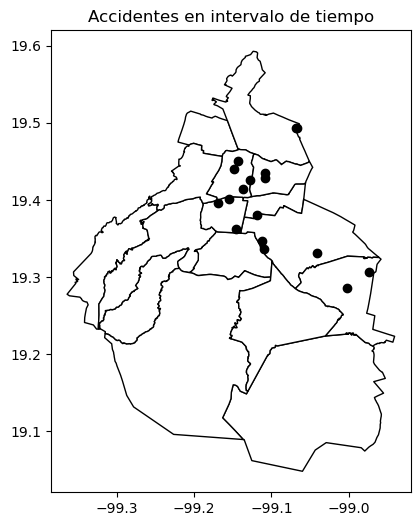

In [277]:
#Plot locations of a specific accident type
axis=mx.plot(
    color= 'white', edgecolor='black')
df_periodo.plot(ax=axis, color='black')
plt.title('Accidentes en intervalo de tiempo')

fig= matplotlib.pyplot.gcf()
fig.set_size_inches(9,6)
#Guardar figura
#fig.savefig('Accidentes_intervalotiempo.png',dpi=200)
plt.show()

In [278]:
#Heat map of all accidents type
periodo = [2022]
mes=[7]
dia=[15]

#Seleccionar intervalo de tiempo
hora_inicio = pd.to_datetime('08:00:00', format='%H:%M:%S').time()
hora_fin = pd.to_datetime('20:00:00', format='%H:%M:%S').time()

df_geo['fecha_creacion'] = pd.to_datetime(df_geo['fecha_creacion'])
df_geo['hora_creacion'] = pd.to_datetime(df_geo['hora_creacion'], format='%H:%M:%S').dt.time
df_periodo_heat = df_geo[(df_geo['fecha_creacion'].dt.year.isin(periodo))& (df_geo['fecha_creacion'].dt.month.isin(mes))]

df_periodo_heat

,folio,fecha_creacion,hora_creacion,dia_semana,fecha_cierre,hora_cierre,tipo_incidente_c4,incidente_c4,alcaldia_inicio,codigo_cierre,...,tipo_entrada,alcaldia_cierre,alcaldia_catalogo,colonia_catalogo,longitud,latitud,Alcaldias_Numero,dia_numerico,tipo_choque,geometry
1718140,C2C/20220701/00066,2022-07-01,11:24:49,Viernes,2022-07-01,14:34:40,Accidente,Choque sin lesionados,CUAUHTEMOC,A,...,BOTÓN DE AUXILIO,CUAUHTEMOC,Cuauhtémoc,Santa Maria La Ribera,-99.155150,19.441450,7,5,2,POINT (-99.15515 19.44145)
1718141,C2C/20220701/00110,2022-07-01,15:54:38,Viernes,2022-07-01,19:04:42,Accidente,Choque sin lesionados,CUAUHTEMOC,A,...,BOTÓN DE AUXILIO,CUAUHTEMOC,Cuauhtémoc,Ampl. Asturias,-99.127580,19.408820,7,5,2,POINT (-99.12758 19.40882)
1718142,C2C/20220701/00114,2022-07-01,16:38:02,Viernes,2022-07-01,19:44:44,Accidente,Choque sin lesionados,CUAUHTEMOC,A,...,BOTÓN DE AUXILIO,CUAUHTEMOC,Cuauhtémoc,Roma Sur,-99.162860,19.404920,7,5,2,POINT (-99.16286 19.40492)
1718143,C2C/20220701/00155,2022-07-01,20:41:17,Viernes,2022-07-01,23:44:45,Accidente,Choque sin lesionados,GUSTAVO A. MADERO,A,...,BOTÓN DE AUXILIO,GUSTAVO A. MADERO,Cuauhtémoc,Peralvillo,-99.129510,19.462380,2,5,2,POINT (-99.12951 19.46238)
1718145,C2N/20220701/00078,2022-07-01,14:40:41,Viernes,2022-07-01,17:44:44,Accidente,Choque sin lesionados,GUSTAVO A. MADERO,A,...,BOTÓN DE AUXILIO,GUSTAVO A. MADERO,Gustavo A. Madero,Nueva Atzacoalco,-99.082480,19.504470,2,5,2,POINT (-99.08248 19.50447)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737830,C5/20220731/06202,2022-07-31,22:51:50,Domingo,2022-08-01,01:53:36,Accidente,Motociclista,ALVARO OBREGON,A,...,LLAMADA DEL 911,ALVARO OBREGON,Álvaro Obregón,Corpus Christy,-99.248561,19.362947,3,7,6,POINT (-99.24856 19.36295)
1737831,C5/20220731/06209,2022-07-31,22:53:44,Domingo,2022-08-01,02:47:55,Accidente,Motociclista,COYOACAN,A,...,LLAMADA DEL 911,COYOACAN,Coyoacán,Copilco Universidad,-99.183875,19.337415,6,7,6,POINT (-99.18388 19.33742)
1737832,C5/20220731/06416,2022-07-31,23:26:21,Domingo,2022-08-01,03:33:31,Accidente,Motociclista,TLALPAN,A,...,LLAMADA DEL 911,TLALPAN,Tlalpan,Colinas Del Ajusco,-99.217784,19.288934,10,7,6,POINT (-99.21778 19.28893)
1737874,C2O/20220731/00335,2022-07-31,21:01:26,Domingo,2022-08-01,01:35:06,Accidente,Choque sin lesionados,IZTAPALAPA,A,...,BOTÓN DE AUXILIO,IZTAPALAPA,Iztapalapa,Ampliacion Emiliano Zapata,-98.978700,19.342810,1,7,2,POINT (-98.97870 19.34281)


In [279]:
mapa_mxcity = folium.Map(location = [df_periodo_heat['latitud'].mean(), df_periodo_heat['longitud'].mean()],
                      zoom_start = 12,
                      tiles = 'cartodbdark_matter')
HeatMap(data = df_periodo_heat[['latitud', 'longitud']]).add_to(mapa_mxcity)
# Delimitaciones
estilo = { 'fillOpacity': 0, 'color': '#FFF', 'weight': 0.5} 
folium.GeoJson(mx, name = 'Ciudad de México', style_function = lambda x: estilo).add_to(mapa_mxcity)
folium.LayerControl().add_to(mapa_mxcity)
#mapa_mxcity.save('mapa_calor_accidentes.html')
mapa_mxcity


In [280]:
df_periodo

,folio,fecha_creacion,hora_creacion,dia_semana,fecha_cierre,hora_cierre,tipo_incidente_c4,incidente_c4,alcaldia_inicio,codigo_cierre,...,tipo_entrada,alcaldia_cierre,alcaldia_catalogo,colonia_catalogo,longitud,latitud,Alcaldias_Numero,dia_numerico,tipo_choque,geometry
1669286,C5/20220415/00502,2022-04-15,01:23:21,Viernes,2022-04-15,04:30:06,Lesionado,Atropellado,IZTAPALAPA,A,...,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,Apatlaco,-99.118565,19.380287,1,5,16,POINT (-99.11856 19.38029)
1669289,C2O/20220415/00216,2022-04-15,18:43:40,Viernes,2022-04-15,23:14:37,Lesionado,Atropellado,IZTAPALAPA,A,...,BOTÓN DE AUXILIO,IZTAPALAPA,Iztapalapa,Desarrollo Urbano Quetzalcoatl,-99.041330,19.331200,1,5,16,POINT (-99.04133 19.33120)
1669290,C5/20220415/02426,2022-04-15,13:04:52,Viernes,2022-04-15,16:10:07,Lesionado,Atropellado,GUSTAVO A. MADERO,A,...,LLAMADA DEL 911,GUSTAVO A. MADERO,Gustavo A. Madero,San Felipe De Jesus,-99.067471,19.493449,2,5,16,POINT (-99.06747 19.49345)
1669384,C5/20220415/01213,2022-04-15,04:03:15,Viernes,2022-04-15,07:10:06,Lesionado,Atropellado,BENITO JUAREZ,A,...,RADIO,BENITO JUAREZ,Benito Juárez,Portales Sur,-99.146343,19.361989,11,5,16,POINT (-99.14634 19.36199)
1669385,C5/20220415/01147,2022-04-15,03:39:15,Viernes,2022-04-15,06:50:05,Lesionado,Atropellado,CUAUHTEMOC,A,...,LLAMADA DEL 911,CUAUHTEMOC,Cuauhtémoc,Obrera,-99.136720,19.414182,7,5,16,POINT (-99.13672 19.41418)
1669386,C5/20220415/03755,2022-04-15,19:11:29,Viernes,2022-04-15,22:20:08,Lesionado,Atropellado,CUAUHTEMOC,A,...,LLAMADA DEL 911,CUAUHTEMOC,Cuauhtémoc,Guerrero,-99.143772,19.451032,7,5,16,POINT (-99.14377 19.45103)
1669389,C5/20220415/03795,2022-04-15,19:20:47,Viernes,2022-04-15,22:30:08,Lesionado,Atropellado,IZTAPALAPA,A,...,RADIO,IZTAPALAPA,Iztapalapa,Pueblo Culhuacan,-99.109093,19.335947,1,5,16,POINT (-99.10909 19.33595)
1669392,C5/20220415/02880,2022-04-15,15:26:44,Viernes,2022-04-15,18:30:09,Lesionado,Atropellado,CUAUHTEMOC,A,...,RADIO,CUAUHTEMOC,Cuauhtémoc,Centro,-99.127940,19.426005,7,5,16,POINT (-99.12794 19.42600)
1669393,C5/20220415/02927,2022-04-15,15:45:54,Viernes,2022-04-15,18:50:07,Lesionado,Atropellado,TLAHUAC,A,...,RADIO,TLAHUAC,Tláhuac,Barrio San Miguel,-98.973498,19.306404,4,5,16,POINT (-98.97350 19.30640)
1669394,C5/20220415/02678,2022-04-15,14:27:32,Viernes,2022-04-15,17:40:05,Lesionado,Atropellado,IZTAPALAPA,A,...,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,Valle Del Sur,-99.111902,19.346674,1,5,16,POINT (-99.11190 19.34667)


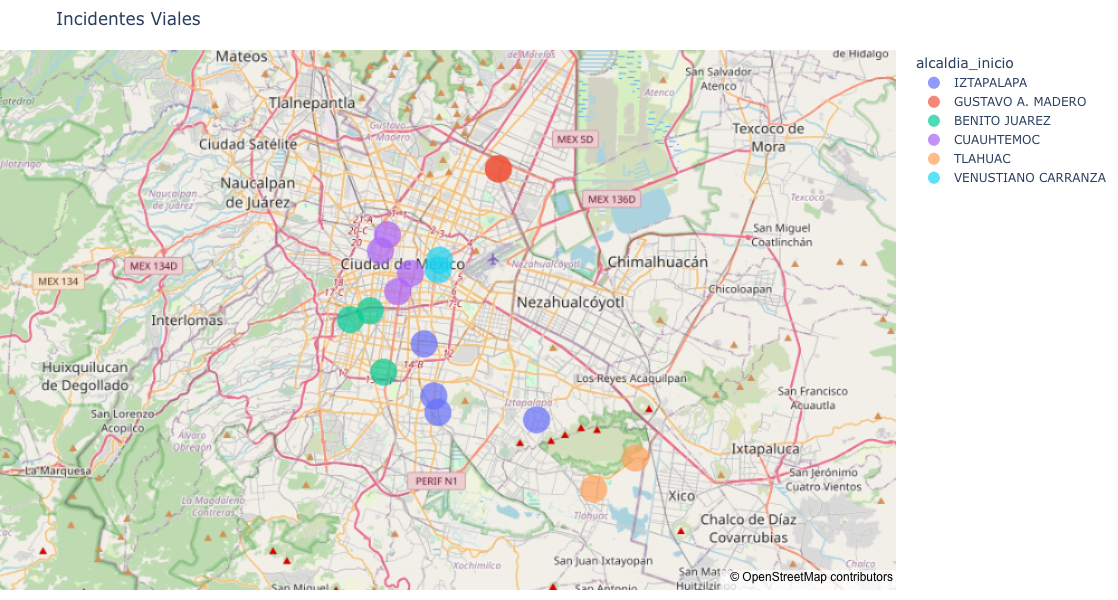

In [281]:
#Map of a specific accident type
fig = px.scatter_mapbox(df_periodo, lon= df_periodo['longitud'],lat=df_periodo['latitud'], 
                        zoom=10, color=df_periodo['alcaldia_inicio'],
                       size=df_periodo['tipo_choque'],
                        width=900, height=600, title='Incidentes Viales'
                       )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":10})
fig.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(24.0, 0.5, 'Número de accidentes')

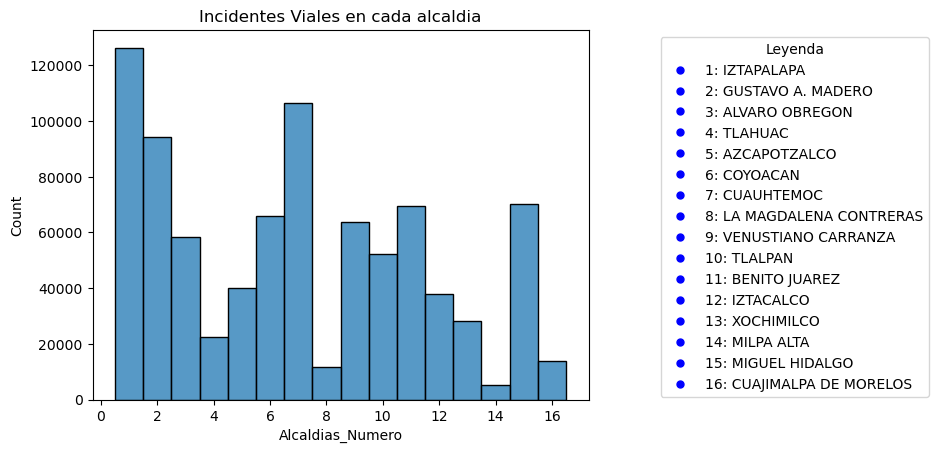

In [369]:

labels=df['alcaldia_inicio'].unique()
sns.histplot(data=df_geo, x='Alcaldias_Numero',discrete=True)
# Crear un diccionario para las etiquetas
label_dict = {i: label for i, label in enumerate(labels, start=1)}
handles = [plt.Line2D([0], [0], color='blue', marker='o',markersize=5, linestyle='', label=f"{key}: {value}") for key, value in label_dict.items()]
plt.legend(handles=handles, title="Leyenda", loc="upper right", bbox_to_anchor=(1.7, 1))


# Agregar título y leyenda
plt.title("Incidentes Viales en cada alcaldia")
ax.set_xlabel("Alcaldia")
ax.set_ylabel("Número de accidentes")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(24.0, 0.5, 'Número de accidentes')

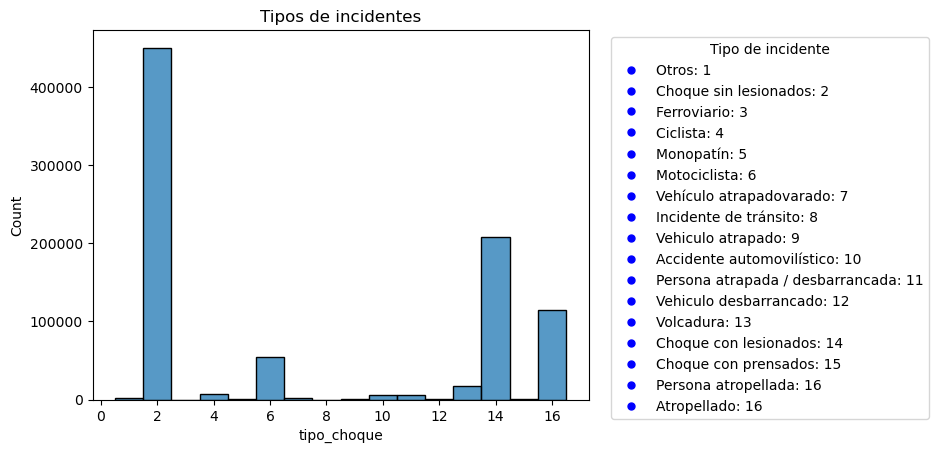

In [383]:
#Distribution of Kind of acci


sns.histplot(data=df_geo, x='tipo_choque',discrete=True)
# Crear un diccionario para las etiquetas

handles = [plt.Line2D([0], [0], color='blue', marker='o',markersize=5, linestyle='', label=f"{key}: {value}") for key, value in mapping.items()]
plt.legend(handles=handles, title="Tipo de incidente", loc="upper right", bbox_to_anchor=(1.7, 1))


# Agregar título y leyenda
plt.title("Tipos de incidentes")
ax.set_xlabel("Tipo de accidente")
ax.set_ylabel("Número de accidentes")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(24.0, 0.5, 'Número de accidentes')

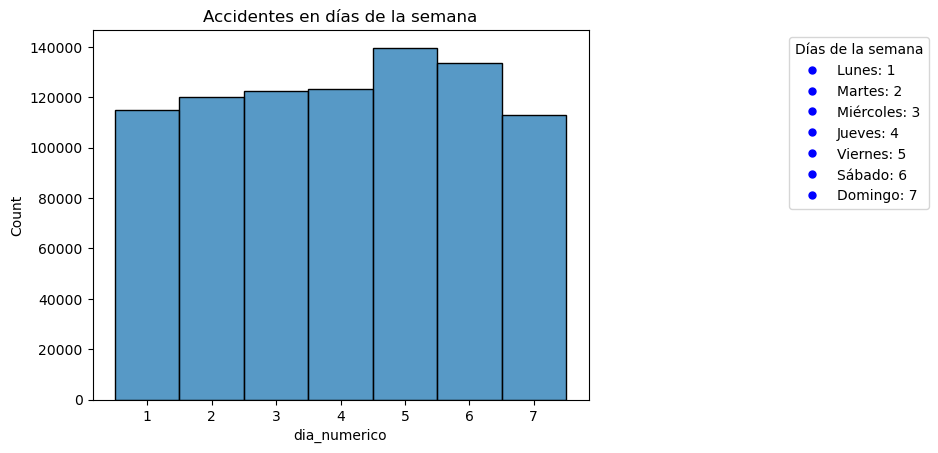

In [381]:
#Distribution of accidents according to day of the week
sns.histplot(data=df_geo, x='dia_numerico',discrete=True)
# Crear un diccionario para las etiquetas

handles = [plt.Line2D([0], [0], color='blue', marker='o',markersize=5, linestyle='', label=f"{key}: {value}") for key, value in mapping_days.items()]
plt.legend(handles=handles, title="Días de la semana", loc="upper right", bbox_to_anchor=(1.7, 1))


# Agregar título y leyenda
plt.title("Accidentes en días de la semana")
ax.set_xlabel("Día de la semana")
ax.set_ylabel("Número de accidentes")